In [1]:
import tensorflow as tf
import importlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import utils_triplet2
import model2
importlib.reload(utils_triplet2)
importlib.reload(model2)
from utils_triplet2 import *
from model2 import *

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [20]:
!p7zip -d /content/gdrive/MyDrive/Thesis/data.7z


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/gdrive/MyDrive/Thesis/                                         1 file, 3091371 bytes (3019 KiB)

Extracting archive: /content/gdrive/MyDrive/Thesis/data.7z
--
Path = /content/gdrive/MyDrive/Thesis/data.7z
Type = 7z
Physical Size = 3091371
Headers Size = 19318
Method = LZMA2:23
Solid = +
Blocks = 1

  0%    
Would you like to replace the existing file:
  Path:     ./data/icon/accessibility/accessible-icon.jpg
  Size:     7305 bytes (8 KiB)
  Modified: 2021-02-28 17:09:46
with the file from archive:
  Path:     data/icon/accessibility/accessible-icon.jpg
  Size:     7305 bytes (8 KiB)
  Modified: 2021-02-28 17:09:46
? (Y)es / (N)o / (A)lways / (S)kip

In [21]:
icons_test, sketches_test = get_icons_and_sketches()
#sketches_test = load_test_set()
#icon_dictionary, sketch_dictionary = load_icons_sketches_dic(icons_test, sketches_test)

In [ ]:
weights_path_sketch = "/content/gdrive/MyDrive/Thesis/GoogleNet/Triplet Loss-CWI/28-03-2021 16-49-16/Train Weights/"
weights_path_icon = "/content/gdrive/MyDrive/Thesis/GoogleNet/Triplet Loss-CWI/28-03-2021 16-49-16/Train Weights/"
iconClassificationModel = googlenet(66)
iconClassificationModel.load_weights(weights_path_icon + 'iconTripletWithCWI')
sketchClassificationModel = googlenet(66)
sketchClassificationModel.load_weights(weights_path_sketch + 'sketchTripletWithCWI')
class_dic = {}
default_class_dic = {}
BATCH_SIZE = 128
acc_1 = 0
acc_10 = 0
sketch_representations = []
for j in range(0, len(sketches_test)):
  default_class_dic[sketches_test[j][1]] = default_class_dic.get(sketches_test[j][1], 0) + 1

for j in range(0, len(sketches_test), BATCH_SIZE):
  batch_sketches = sketches_test[j:j+BATCH_SIZE]
  sketches_array = get_batch_sketches(batch_sketches)
  sketch_repr =  sketchClassificationModel(sketches_array, training = False)[3]
  sketch_representations.append(sketch_repr)
sketch_representations = np.vstack(sketch_representations)

icon_representations = []
for j in range(0, len(icons_test), BATCH_SIZE):
  batch_icons = icons_test[j:j+BATCH_SIZE]
  icons_array = get_batch_icons(batch_icons)
  icons_repr =  iconClassificationModel(icons_array, training = False)[3]
  icon_representations.append(icons_repr)

icon_representations = np.vstack(icon_representations)

for k in range(len(sketch_representations)):
  sketch_repr = sketch_representations[k]
  sketch_representations_tile = np.tile(sketch_repr, len(icons_test)).reshape(len(icons_test), 256)
  diff = np.sqrt(np.mean((sketch_representations_tile - icon_representations)**2, -1))
  top_k = np.argsort(diff)[:10]
      
  for j in range(len(top_k)):
    index = top_k[j]
    if j == 0 and sketches_test[k][0].split("_")[0] == icons_test[index][0].replace(".jpg",""):
      class_dic[sketches_test[k][1]] = class_dic.get(sketches_test[k][1], 0) + 1
      acc_1 = acc_1 + 1
      acc_10 = acc_10 + 1
      #break
    elif sketches_test[k][0].split("_")[0] == icons_test[index][0].replace(".jpg",""):
      class_dic[sketches_test[k][1]] = class_dic.get(sketches_test[k][1], 0) + 1
      acc_10 = acc_10 + 1
      #break   
print("Accuracy of top 1: " + str(acc_1/len(sketches_test)))
print("Accuracy of top 10: " + str(acc_10/len(sketches_test)))
print(class_dic)
print(default_class_dic)

Accuracy of top 1: 0.2153846153846154
Accuracy of top 10: 0.6153846153846154
{'animals': 14, 'alert': 15, 'arrows': 11}
{'animals': 20, 'alert': 28, 'arrows': 17}


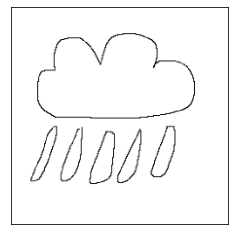

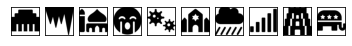

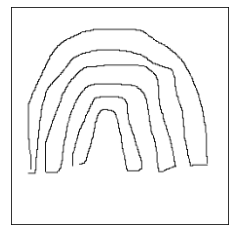

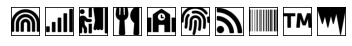

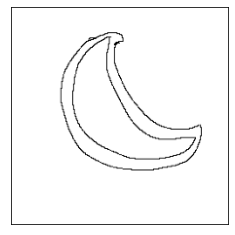

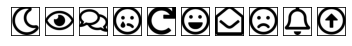

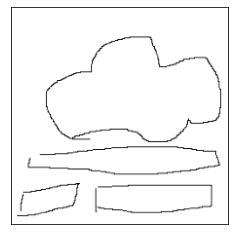

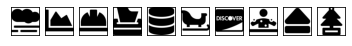

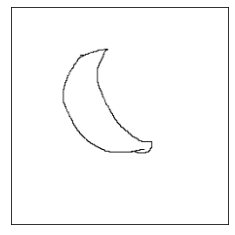

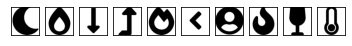

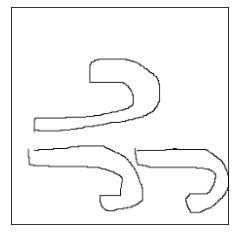

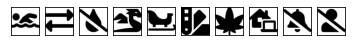

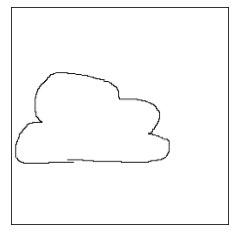

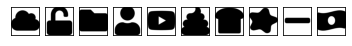

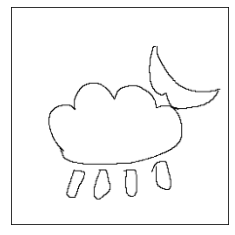

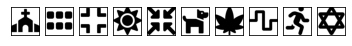

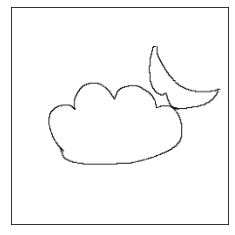

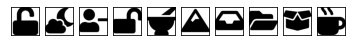

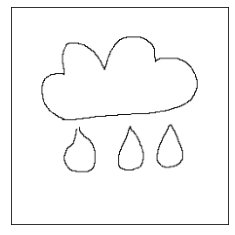

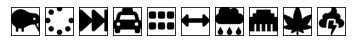

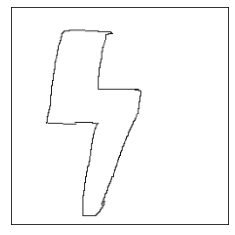

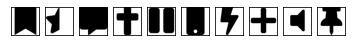

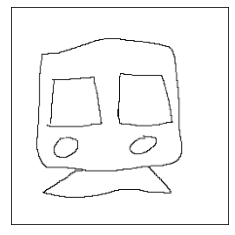

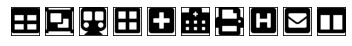

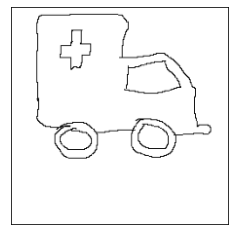

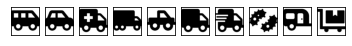

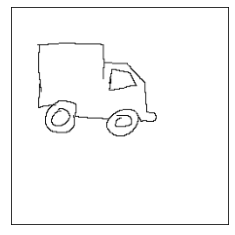

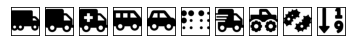

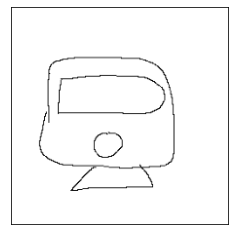

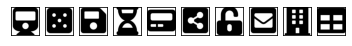

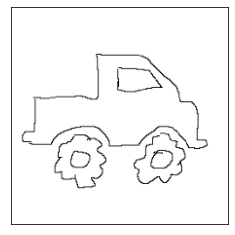

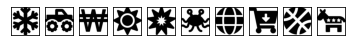

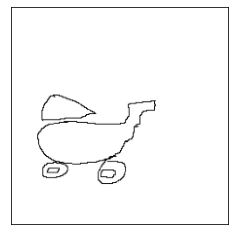

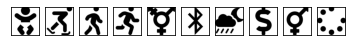

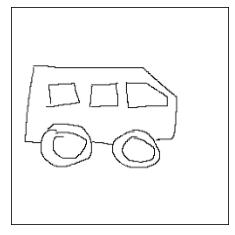

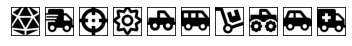

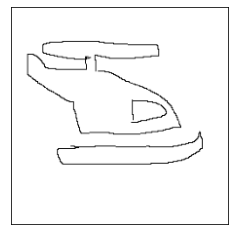

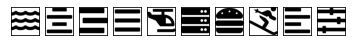

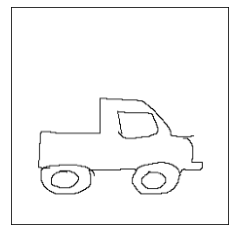

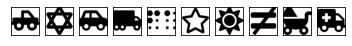

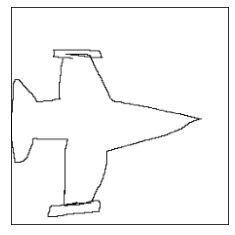

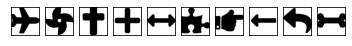

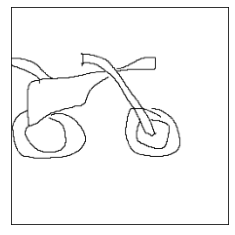

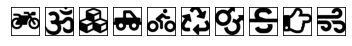

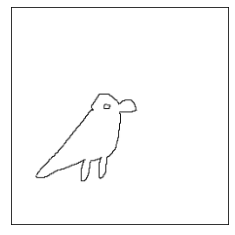

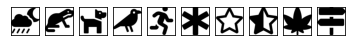

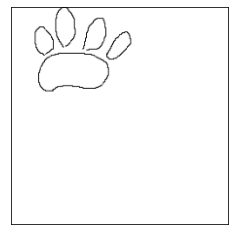

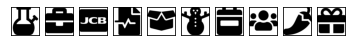

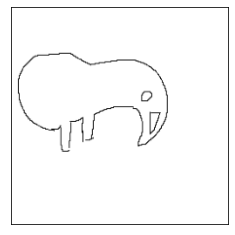

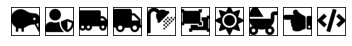

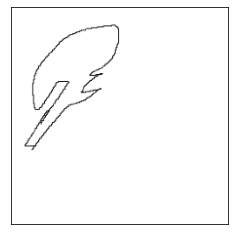

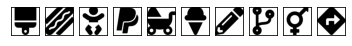

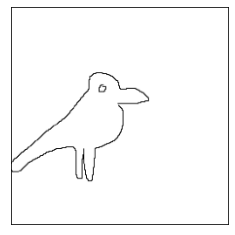

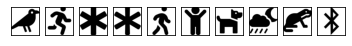

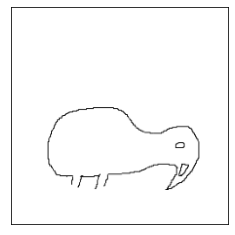

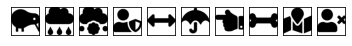

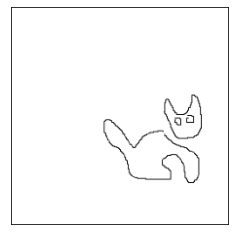

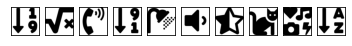

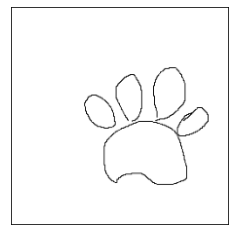

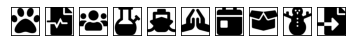

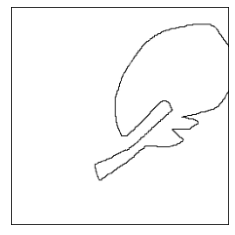

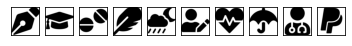

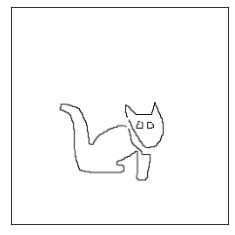

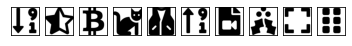

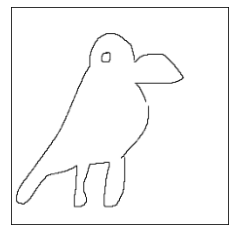

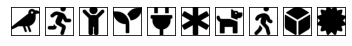

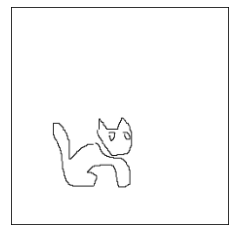

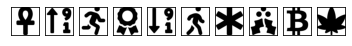

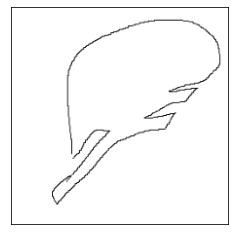

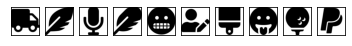

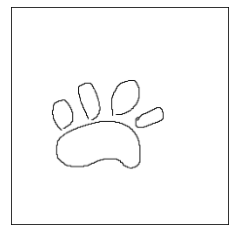

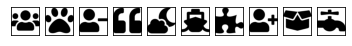

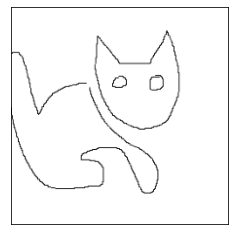

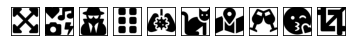

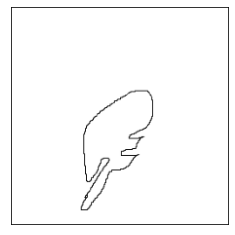

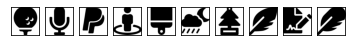

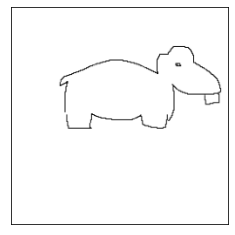

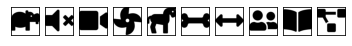

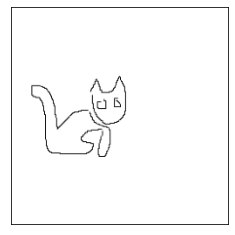

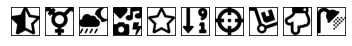

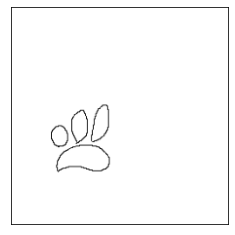

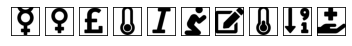

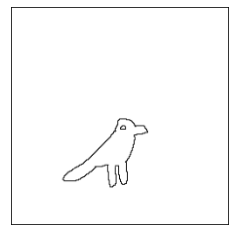

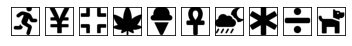

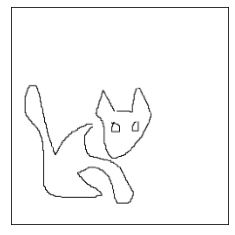

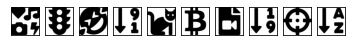

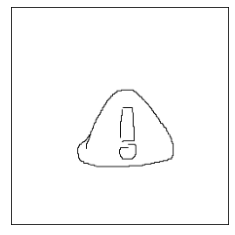

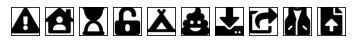

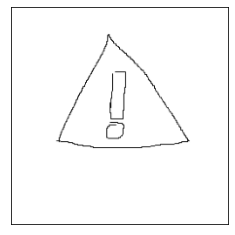

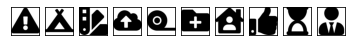

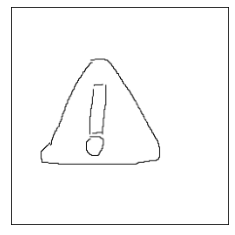

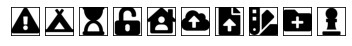

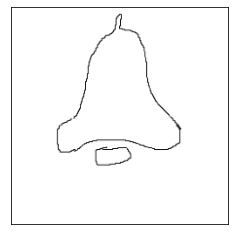

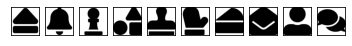

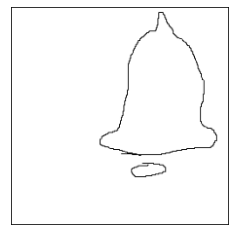

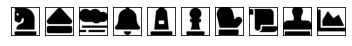

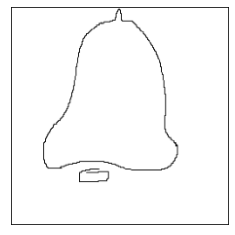

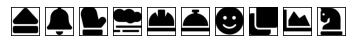

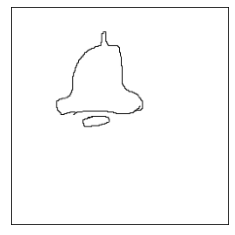

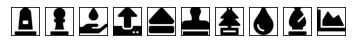

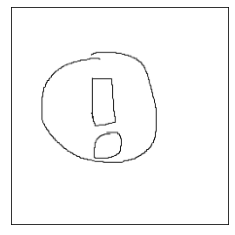

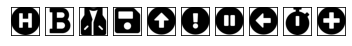

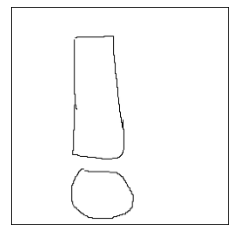

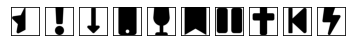

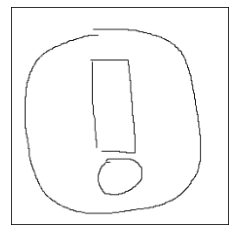

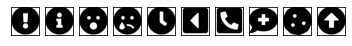

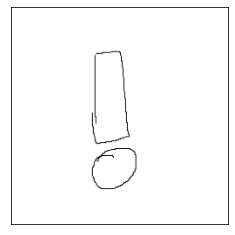

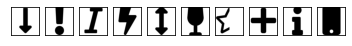

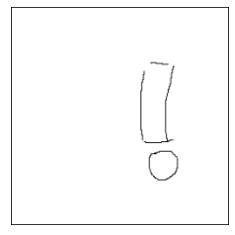

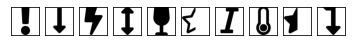

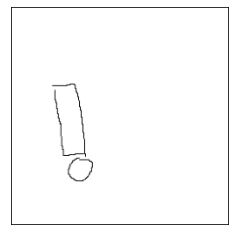

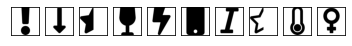

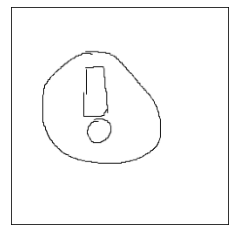

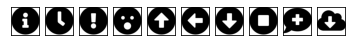

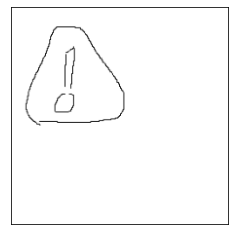

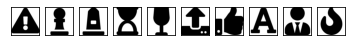

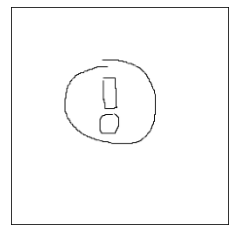

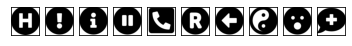

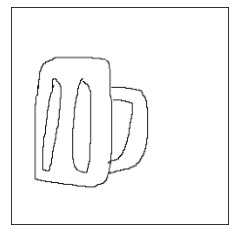

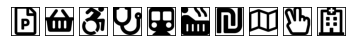

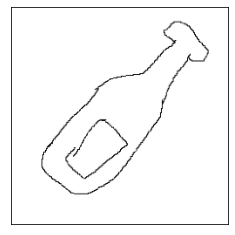

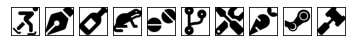

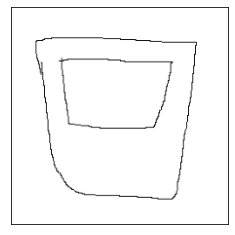

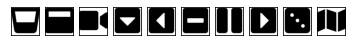

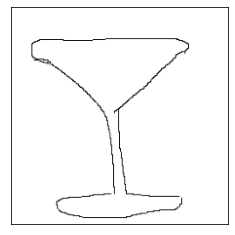

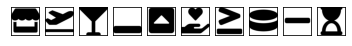

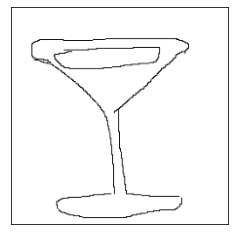

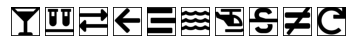

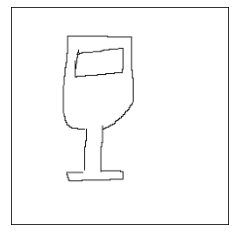

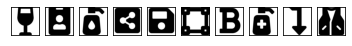

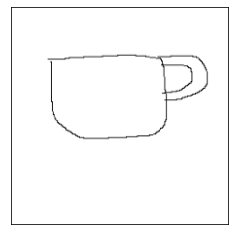

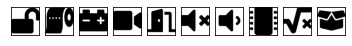

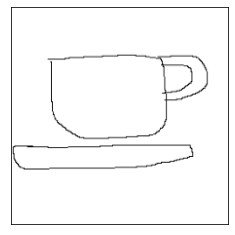

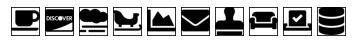

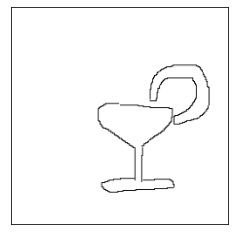

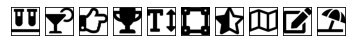

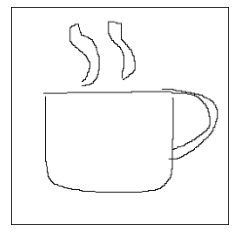

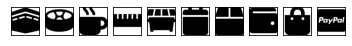

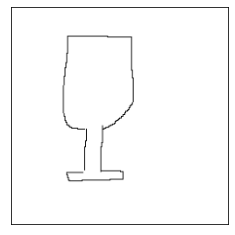

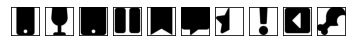

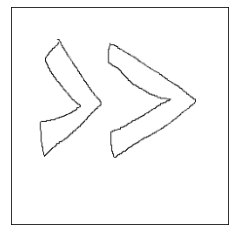

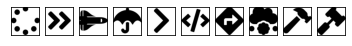

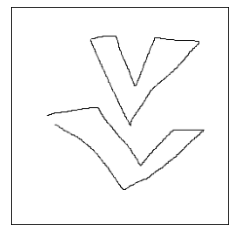

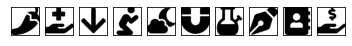

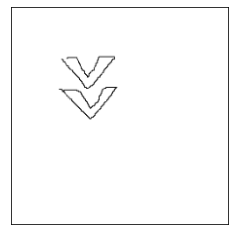

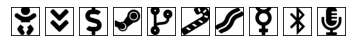

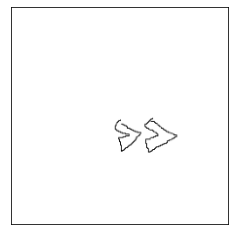

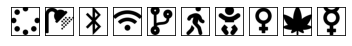

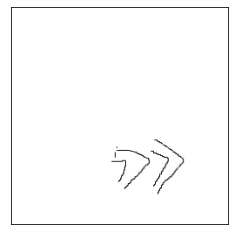

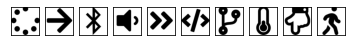

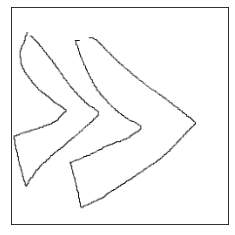

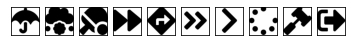

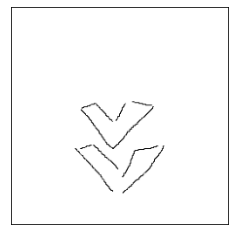

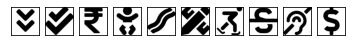

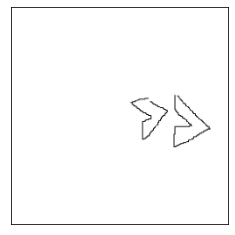

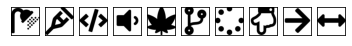

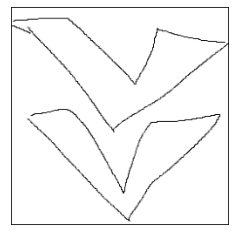

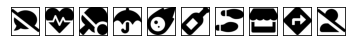

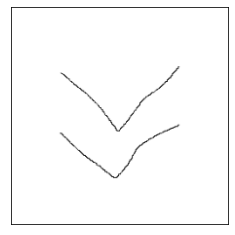

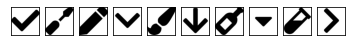

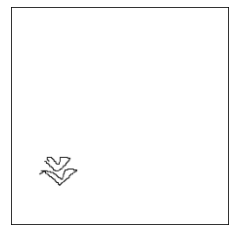

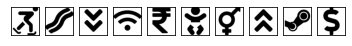

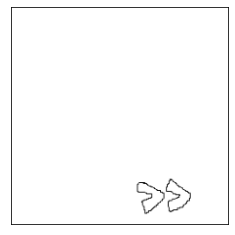

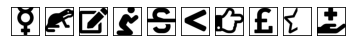

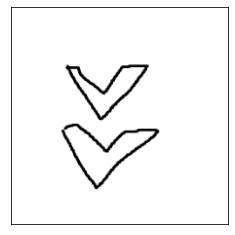

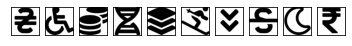

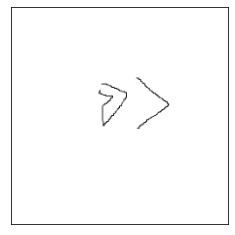

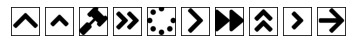

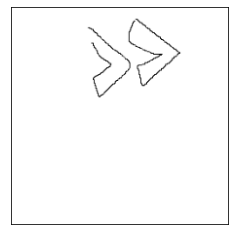

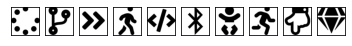

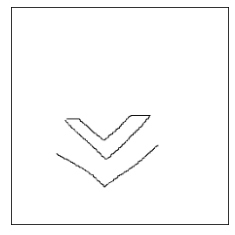

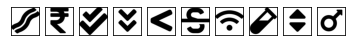

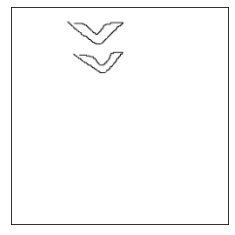

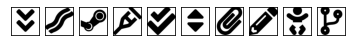

Accuracy of top 1: 0.3103448275862069
Accuracy of top 10: 0.7701149425287356


In [22]:
weights_path_sketch = "/content/gdrive/MyDrive/Thesis/GoogleNet/Triplet Loss-CWI/28-03-2021 16-49-16/Train Weights/"
weights_path_icon = "/content/gdrive/MyDrive/Thesis/GoogleNet/Triplet Loss-CWI/28-03-2021 16-49-16/Train Weights/"
iconClassificationModel = googlenet(66)
iconClassificationModel.load_weights(weights_path_icon + 'iconTripletWithCWI')
sketchClassificationModel = googlenet(66)
sketchClassificationModel.load_weights(weights_path_sketch + 'sketchTripletWithCWI')
BATCH_SIZE = 128
acc_1 = 0
acc_10 = 0
sketch_representations = []
for j in range(0, len(sketches_test), BATCH_SIZE):
    batch_sketches = sketches_test[j:j+BATCH_SIZE]
    sketches_array = get_batch_sketches(batch_sketches)
    sketch_repr =  sketchClassificationModel(sketches_array, training = False)[3]
    sketch_representations.append(sketch_repr)
sketch_representations = np.vstack(sketch_representations)

icon_representations = []
for j in range(0, len(icons_test), BATCH_SIZE):
    batch_icons = icons_test[j:j+BATCH_SIZE]
    icons_array = get_batch_icons(batch_icons)
    icons_repr =  iconClassificationModel(icons_array, training = False)[3]
    icon_representations.append(icons_repr)

icon_representations = np.vstack(icon_representations)
icons = get_batch_icons(icons_test)
sketches = get_batch_sketches(sketches_test)
for k in range(len(sketch_representations)):
    sketch_repr = sketch_representations[k]
    sketch_representations_tile = np.tile(sketch_repr, len(icons_test)).reshape(len(icons_test), 256)
    diff = np.sqrt(np.mean((sketch_representations_tile - icon_representations)**2, -1))
    top_k = np.argsort(diff)[:10]
    
    img = sketches[k]
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
    
    for j in range(len(top_k)):
        index = top_k[j]
        if j == 0 and sketches_test[k][0].split("_")[0] == icons_test[index][0].replace(".jpg",""):
            acc_1 = acc_1 + 1
            acc_10 = acc_10 + 1
            #break
        elif sketches_test[k][0].split("_")[0] == icons_test[index][0].replace(".jpg",""):
            acc_10 = acc_10 + 1
            #break
        
        img = icons[index]
        plt.subplot(1, 10, j+1)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
    plt.show()     
print("Accuracy of top 1: " + str(acc_1/len(sketches_test)))
print("Accuracy of top 10: " + str(acc_10/len(sketches_test)))